<h1>Lab 08</h1>
<h4>Name : Ambalia Harshit</h4>
<h4>Roll No. : MT001</h4>

<h3>AIM : Artificial Neural Network</h3>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
training_data_OR = [(np.array([0,0,1]), 0),
                    (np.array([0,1,1]), 1),
                    (np.array([1,0,1]), 1),
                    (np.array([1,1,1]), 1)]

training_data_AND = [(np.array([0,0,1]), 0),
                     (np.array([0,1,1]), 0),
                     (np.array([1,0,1]), 0),
                     (np.array([1,1,1]), 1)]

training_data_NAND = [(np.array([0,0,1]), 1),
                      (np.array([0,1,1]), 1),
                      (np.array([1,0,1]), 1),
                      (np.array([1,1,1]), 0)]

training_data_XNOR = [(np.array([0,0,1]), 1),
                      (np.array([0,1,1]), 0),
                      (np.array([1,0,1]), 0),
                      (np.array([1,1,1]), 1)]

In [3]:
def step_activation(x):
    return 0 if x < 0 else 1

In [11]:
learning_rate = 0.3
epochs = 500

def learn(training_data, weights, epochs):
    for i in range(epochs):
        x, label = random.choice(training_data)
        dot_product = np.dot(weights, x)
        error = label - step_activation(dot_product)
        weights += learning_rate * error * x

In [9]:
def plot(testing_data, weights, title, is_NOT = False):
    plt.rcParams['figure.figsize'] = (6.0, 5.0)
    plt.title(title)
    plt.xlim([-1,2])
    plt.ylim([-0.5,1.5])
    if is_NOT:
        x = (-1 * weights[1] / weights[0])
        y = 0
        plt.scatter([x[0][0] for x in testing_data], [0] * len(testing_data), marker='o', c='b')
        plt.plot(x, y, 'ro')
    else:
        x = np.arange(-2,3,0.1)
        y = ((-1 * weights[1] / weights[0]) * x) + (-1 * weights[2] / weights[0])
        plt.scatter([x[0][0] for x in testing_data], [x[0][1] for x in testing_data], marker='o', c='b')
        plt.plot(x, y)
    plt.show()

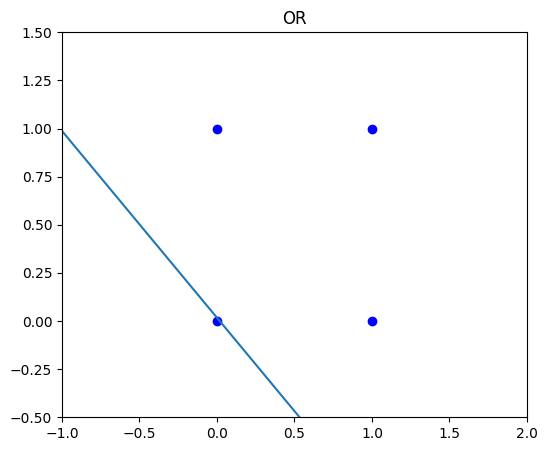

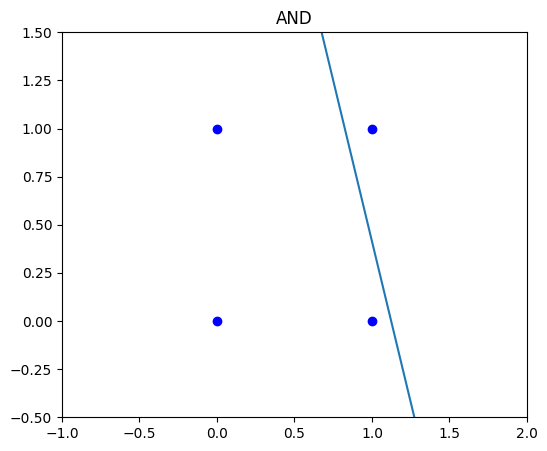

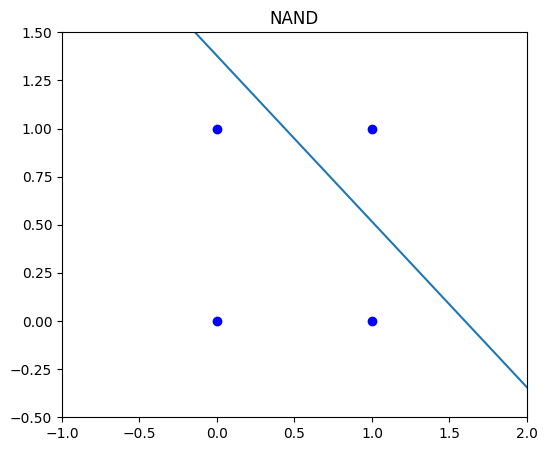

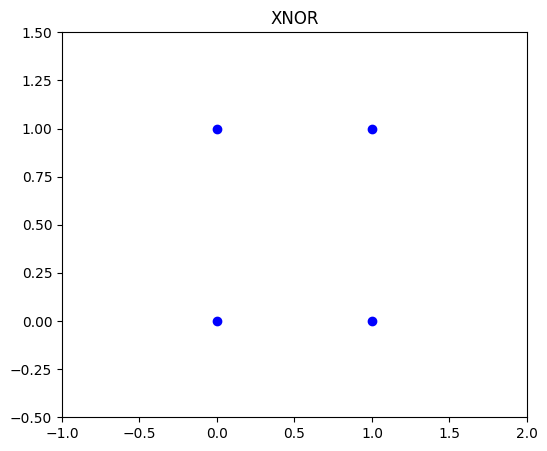

In [10]:
weights = np.random.rand(3)
# print(weights)
# weights = [0.25352419, 0.70345503, 0.73438491]
learn(training_data_OR, weights, epochs)
plot(training_data_OR, weights, "OR")

weights = np.random.rand(3)
# print(weights)
# weights = [0.11682105, 0.59218824, 0.54754527]
learn(training_data_AND, weights, epochs)
plot(training_data_AND, weights, "AND")

weights = np.random.rand(3)
# print(weights)
# weights = [0.25352419, 0.70345503, 0.73438491]
learn(training_data_NAND, weights, epochs)
plot(training_data_NAND, weights, "NAND")

weights = np.random.rand(3)
# print(weights)
# weights = [0.63625622, 0.38238098, 0.12150335]
learn(training_data_XNOR, weights, epochs)
plot(training_data_XNOR, weights, "XNOR")

# With hidden layer

In [12]:
import numpy as np
import random

In [13]:
learning_rate = 0.3
epochs = 500
hidden_layer_size = 3

In [14]:
# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [15]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [16]:
def learn(training_data, input_weights, hidden_weights, epochs):
    for _ in range(epochs):
        x, label = random.choice(training_data)

        # Forward propagation for hidden layer
        hidden_input = np.dot(x, input_weights)
        hidden_output = sigmoid(hidden_input)

        # Forward propagation for output layer
        output = np.dot(hidden_output, hidden_weights)
        predicted_label = sigmoid(output)

        # Backpropagation for output layer
        output_error = label - predicted_label
        output_delta = output_error * sigmoid_derivative(predicted_label)

        # Backpropagation for hidden layer
        hidden_error = output_delta.dot(hidden_weights.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

        # Updating weights
        hidden_weights += learning_rate * hidden_output.reshape(-1, 1) * output_delta
        input_weights += learning_rate * x.reshape(-1, 1) * hidden_delta

    return input_weights, hidden_weights

In [19]:
def nand_gate(x1, x2):
    inputs = np.array([x1, x2])
    weights = np.array([-1, -1])  # NAND gate weights
    threshold = -1  # NAND gate threshold
    result = np.sum(inputs * weights) + threshold
    return int(result >= 0)

In [20]:
training_data = []
for _ in range(1000):  # Generate 1000 random samples for training
    x1 = random.choice([0, 1])
    x2 = random.choice([0, 1])
    output = nand_gate(x1, x2)
    training_data.append((np.array([x1, x2]), output))

In [21]:
# Initialize random weights for input and hidden layer
input_weights = np.random.rand(len(training_data[0][0]), hidden_layer_size)
hidden_weights = np.random.rand(hidden_layer_size, 1)

In [23]:
input_weights, hidden_weights = learn(training_data, input_weights, hidden_weights, epochs)
input_weights

array([[1.05613736, 0.83695152, 0.62192365],
       [0.33750001, 1.09103402, 0.43112848]])

In [24]:
hidden_weights

array([[-1.98982386],
       [-1.81971769],
       [-1.16893196]])

In [25]:
def plot(testing_data, weights, title, is_NOT = False):
    plt.rcParams['figure.figsize'] = (6.0, 5.0)
    plt.title(title)
    plt.xlim([-1,2])
    plt.ylim([-0.5,1.5])
    if is_NOT:
        x = (-1 * weights[1] / weights[0])
        y = 0
        plt.scatter([x[0][0] for x in testing_data], [0] * len(testing_data), marker='o', c='b')
        plt.plot(x, y, 'ro')
    else:
        x = np.arange(-2,3,0.1)
        y = ((-1 * weights[1] / weights[0]) * x) + (-1 * weights[2] / weights[0])
        plt.scatter([x[0][0] for x in testing_data], [x[0][1] for x in testing_data], marker='o', c='b')
        plt.plot(x, y)
    plt.show()

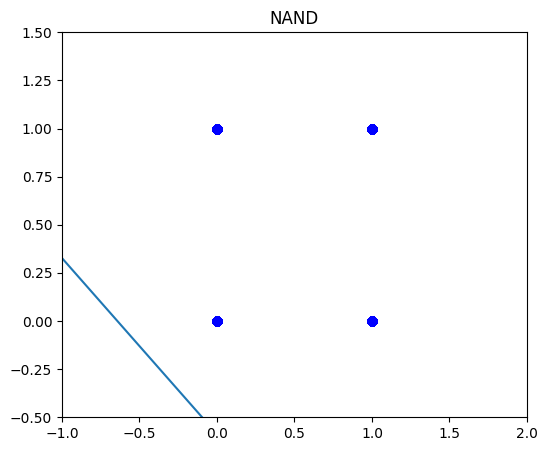

In [27]:
plot(training_data, hidden_weights, "NAND")